In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114


In [5]:
data.shape

(282451, 16)

In [6]:
data.describe

<bound method NDFrame.describe of         Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          26    92  2011-08-26      87235.57      False        61.10   
1          34    22  2011-03-25       5945.97      False        53.11   
2          21    28  2010-12-03       1219.89      False        50.43   
3           8     9  2010-09-17      11972.71      False        75.32   
4          19    55  2012-05-18       8271.82      False        58.81   
...       ...   ...         ...           ...        ...          ...   
282446     27    18  2012-10-19      20775.91      False        56.53   
282447     39    36  2010-05-21       5350.00      False        76.67   
282448     14    29  2010-04-30      10939.87      False        53.15   
282449     15    90  2011-07-01       5013.89      False        67.43   
282450     13    32  2011-10-14       8103.12      False        51.74   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0           

In [7]:
data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167


In [8]:
data.Temperature.min(),data.Temperature.max()

(-2.06, 100.14)

In [9]:
data.Weekly_Sales.min(),data.Weekly_Sales.max()

(-4988.94, 693099.36)

### Null values

In [10]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [11]:
null_columns = data.iloc[:,7:12].columns
for column in null_columns:
    number_missing = data[column].isnull().sum()
    percentage_missing = (number_missing/data.shape[0])*100
    print(f'{percentage_missing}% of values are missing from {column}')

64.41152624703047% of values are missing from MarkDown1
73.71862730172667% of values are missing from MarkDown2
67.59756559544842% of values are missing from MarkDown3
68.12509072370074% of values are missing from MarkDown4
64.2313179985201% of values are missing from MarkDown5


#### little EDA

Store: [26 34 21  8 19 13  2 32 45 44  4  6  5 35 28 38 16 36  1 27 22 40 18 42
 33 25 10 20 41 30 14 24 37 11 17 23 15  7 29  3 39  9 12 31 43]
45 unique Store entries


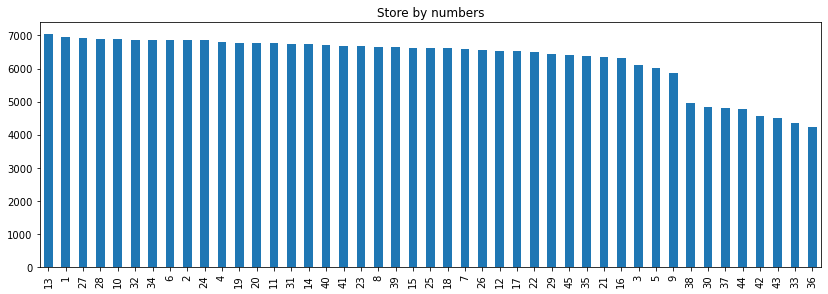

Dept: [92 22 28  9 55 91 14 82 26 72 19 81 96 23 40 38 95 32 10  4 42 46 34 97
 83 48 18 12 60 11 16 33 71 87 94  7  8  3 93 85  1 99 52  2 30 98 27 36
 21 25 58  5 31 49 50 35 80 41 90  6 29 54 51 17 67 45 74 13 20 44 59 37
 24 79 56 78 47 77 65 43 39]
81 unique Dept entries


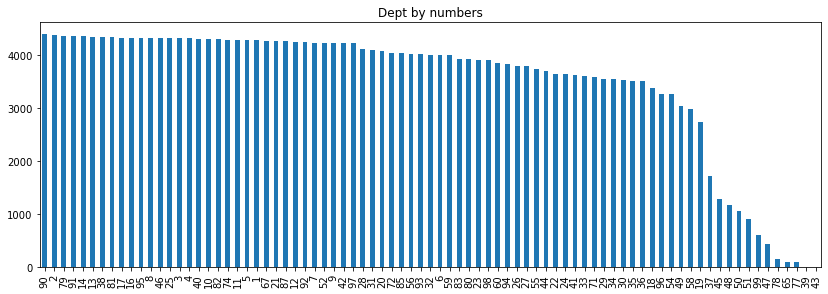

Type: ['A' 'B' 'C']
3 unique Type entries


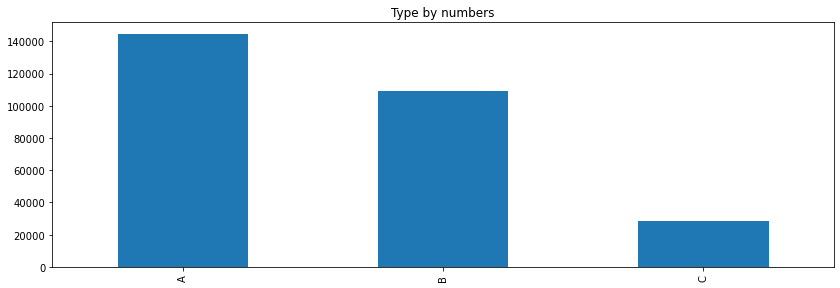

IsHoliday: [False  True]
2 unique IsHoliday entries


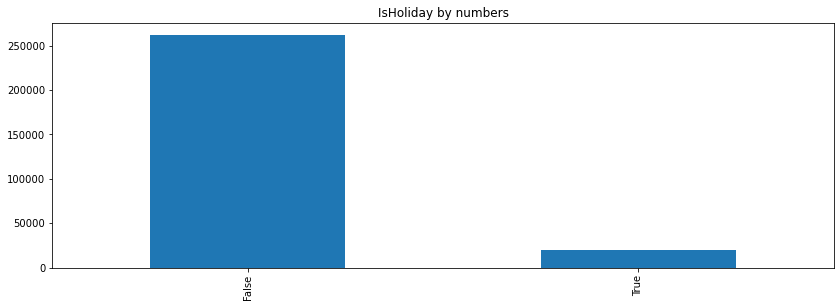

In [12]:
for column in data[['Store','Dept','Type','IsHoliday']].columns:
    data[column].value_counts().plot(kind='bar',figsize=(14,4.5))
    print(f'{column}:' ,data[column].unique())
    print(len(data[column].unique()),f'unique {column} entries')
    plt.title(f'{column} by numbers')
    plt.show()

In [13]:
data[['Size','Weekly_Sales']].corr()

,Size,Weekly_Sales
Size,1.000000,0.243935
Weekly_Sales,0.243935,1.000000


#### new columns creation from the date column

In [14]:
data['Year'] = pd.to_datetime(data['Date']).dt.year

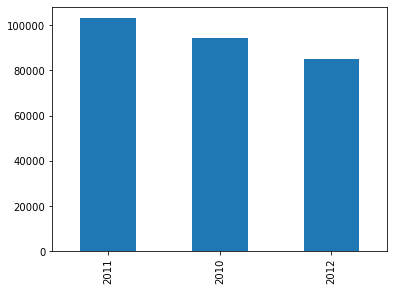

2011    102979
2010     94469
2012     85003
Name: Year, dtype: int64


In [15]:
data['Year'].value_counts().plot(kind='bar',figsize=(6,4.5))
plt.show()
print(data['Year'].value_counts())

In [16]:
data['Month'] = pd.to_datetime(data['Date']).dt.month

In [17]:
data['Day'] = pd.to_datetime(data['Date']).dt.day

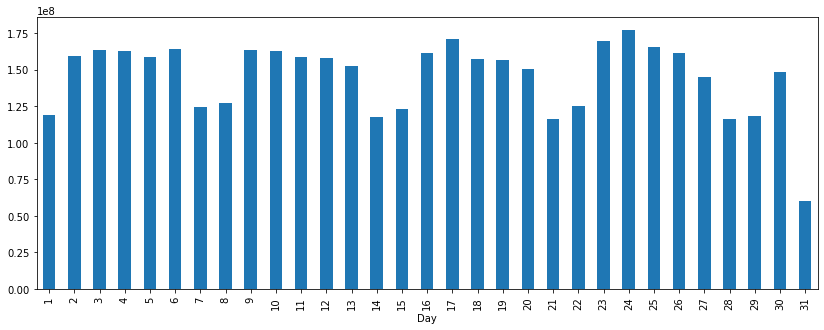

In [18]:
data.groupby('Day').sum()['Weekly_Sales'].plot(kind='bar',figsize=(14,5))
plt.show()

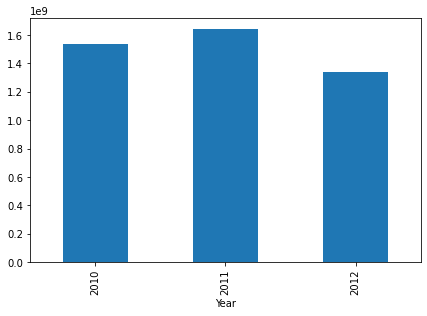

In [19]:
data.groupby('Year').sum()['Weekly_Sales'].plot(kind='bar',figsize=(7,4.5))
plt.show()

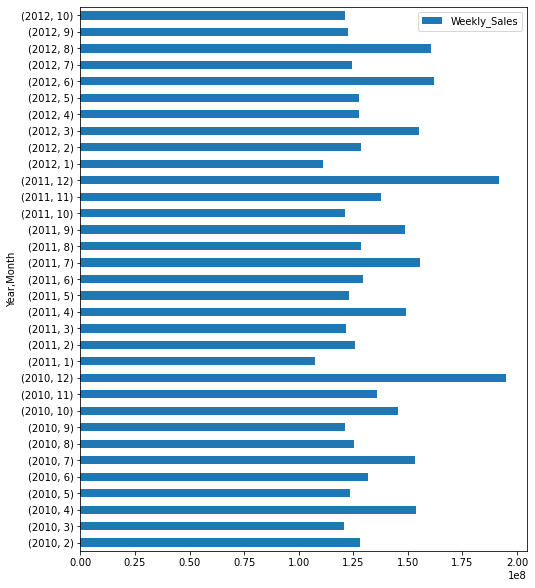

In [20]:
pd.DataFrame(data.groupby(['Year','Month']).sum()['Weekly_Sales']).plot(kind='barh',figsize=(8,10))
plt.show()

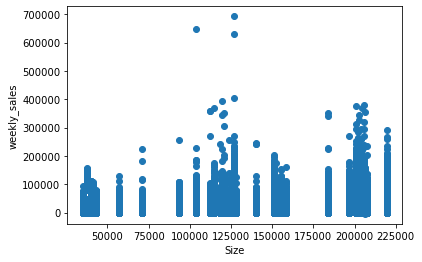

In [21]:
plt.scatter(x=data.Size,y= data.Weekly_Sales)
plt.ylabel('weekly_sales')
plt.xlabel('Size')
plt.show()

#### visualizing Markdown columns

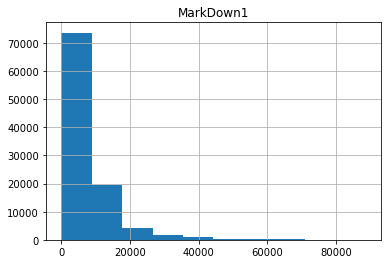

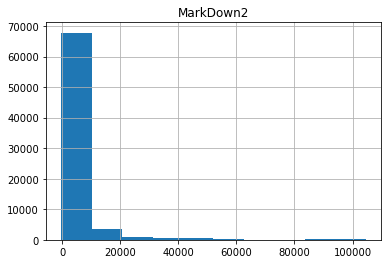

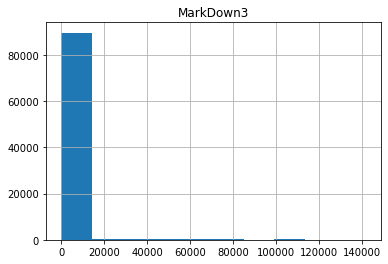

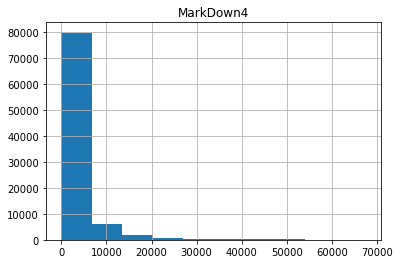

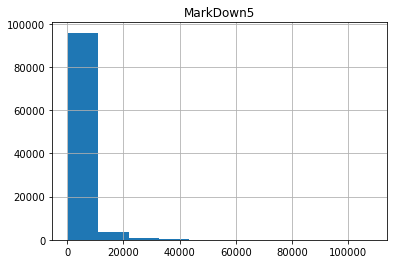

In [22]:
null_columns = data.iloc[:,7:12].columns
for column in null_columns:
    data[column].hist()
    plt.title(column)
    plt.show()

#### ways to handle missing data - Dropping ,Filling....
#### Dropping the entire columns and testing the model performance on a new data2
#### Also serves as a bases of comparism for checking improvement in model performance along the feature enginerring process

#### --using random forest regressor

In [59]:
data2 = pd.read_csv('train.csv')
data2.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114


In [60]:
labeller = LabelEncoder()
data2.Type = labeller.fit_transform(data2.Type)
data2.IsHoliday = labeller.fit_transform(data2.IsHoliday)
data2 = data2.drop(['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
X = scale(data2.drop('Weekly_Sales',axis=1))
y = data2.Weekly_Sales

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
rand = RandomForestRegressor()
scores = cross_val_score(rand,X,y,scoring='r2',cv=5)
print(scores)
print('cross-validation-score',np.mean(scores))

[0.93742171 0.93468164 0.94335625 0.93210892 0.93328579]
cross-validation-score 0.9361708620579856


In [62]:
rand.fit(x_train,y_train)
r2_score(y_test,rand.predict(x_test))

0.9328062825710529

In [27]:
### Adding some extra features

In [28]:
### grouping temperature into weather conditions

In [29]:
label_names= ['cold','warm','hot']
boundaries = [-10,55,75,max(data.Temperature)]
data['Temp_Description'] = pd.cut(data['Temperature'],boundaries,labels = label_names)

In [30]:
## creating new feature based of of clusters

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Year','CPI','Fuel_Price','Size','Unemployment']])
data['cluster_one'] = kmeans.labels_

In [32]:
## filling null values with the median as against dropping them

In [33]:
null_columns = data.iloc[:,7:12].columns
for column in null_columns:
    data[column] = data[column].fillna(data[column].median())

In [34]:
### label encoding and visualizing correlation

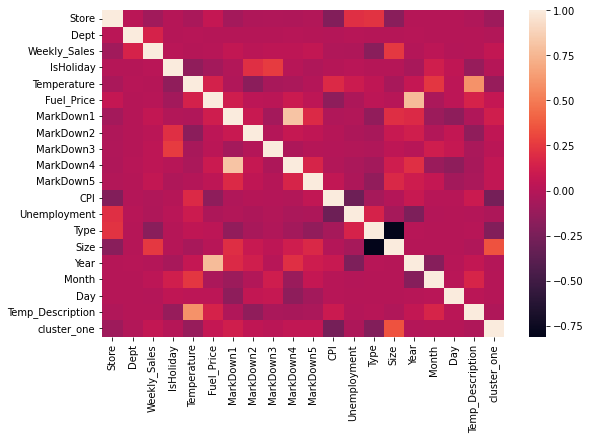

In [35]:
labeller = LabelEncoder()
data.Temp_Description = labeller.fit_transform(data.Temp_Description)
data.Type = labeller.fit_transform(data.Type)
data.IsHoliday = labeller.fit_transform(data.IsHoliday)
#### plotting correlation
plt.figure(figsize=(9,6))
sns.heatmap(data.corr())
plt.show()

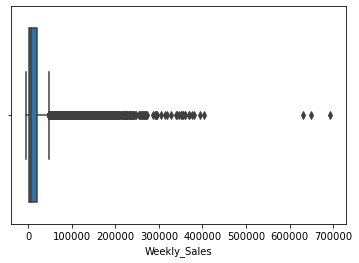

In [36]:
sns.boxplot(x='Weekly_Sales',data=data)
plt.show()

In [37]:
data = data[data['Weekly_Sales']< 600000]
X = data.drop(['Date','Weekly_Sales'],axis=1)
y =data.Weekly_Sales

#### visualizing feature importances

In [38]:
def features_importance(X, y):
    scores = mutual_info_regression(X, y)
    scores = pd.Series(scores, name="MI Scores", index=X.columns) 
    scores = scores.sort_values(ascending=False)
    return scores

def plot_feature_importance(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Feature Importances")

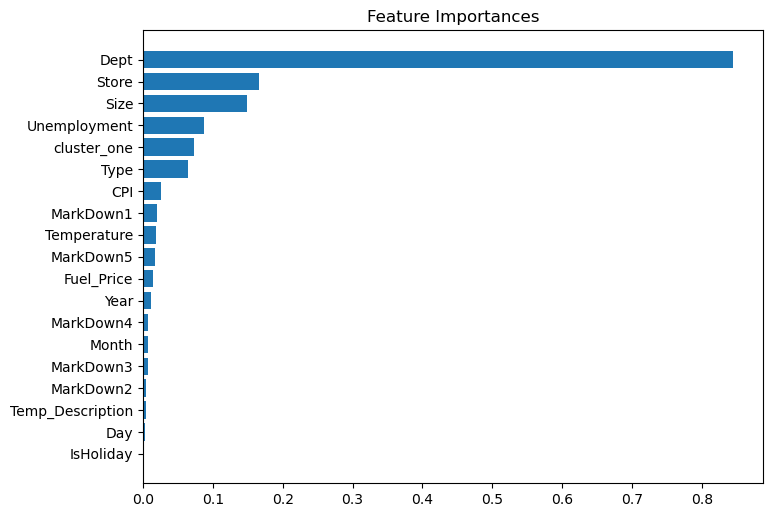

In [40]:
scores = features_importance(X, y)
plt.figure(dpi=100, figsize=(8, 6))
plot_feature_importance(scores)

IsHoliday has a score of 0.00000 but has effect on the models performance when removed

In [41]:
X = scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### Tested a couple of other algorithms as well

In [53]:
def regressors_cv_scores(X,y):
    models={'xgboost':XGBRegressor(),'ada':AdaBoostRegressor(),'rf':RandomForestRegressor(),
           'xtra_tree':ExtraTreesRegressor()}
    for model in models:
        cv_scores = cross_val_score(models[model],X,y,scoring='r2',cv=5)
        print(model,'cross validation score:', np.mean(cv_scores))

In [54]:
def regressor_Xtest_score(X_train,X_test,y_train,y_test):
    models={'xgboost':XGBRegressor(),'ada':AdaBoostRegressor(),'rf':RandomForestRegressor(),
           'xtra_tree':ExtraTreesRegressor()}
    for x in models:
        models[x].fit(X_train,y_train)
        y_pred = models[x].predict(X_test)
        print({x: r2_score(y_test,y_pred)})

In [55]:
regressor_cv_scores(X,y)

xgboost cross validation score: 0.9402611708803403
ada cross validation score: -0.2763874582836576
rf cross validation score: 0.9725241106309657
xtra_tree cross validation score: 0.970879237149551


In [56]:
regressor_Xtest_score(X_train,X_test,y_train,y_test)

{'xgboost': 0.9412803125388894}
{'ada': -0.2126468394181007}
{'rf': 0.9739081243123606}
{'xtra_tree': 0.9729086331923085}


#### --- conclusion
#### --- Random Forest r2 Score improved from 0.93 to 0.97 after feature engineering 